In [2]:
import csv
import numpy as np
import tensorflow as tf
from tensorflow.keras.preprocessing.image import ImageDataGenerator
from os import getcwd

In [3]:
def get_data(filename):
    with open(filename) as training_file:
        reader = csv.reader(training_file, delimiter=',')    
        imgs = []
        labels = []

        next(reader, None)
        
        for row in reader:
            label = row[0]
            data = row[1:]
            img = np.array(data).reshape((28, 28))

            imgs.append(img)
            labels.append(label)

        images = np.array(imgs).astype(float)
        labels = np.array(labels).astype(float)  
    return images, labels

path_sign_mnist_train = f"{getcwd()}/../tmp2/sign_mnist_train.csv"
path_sign_mnist_test = f"{getcwd()}/../tmp2/sign_mnist_test.csv"
training_images, training_labels = get_data(path_sign_mnist_train)
testing_images, testing_labels = get_data(path_sign_mnist_test)
print(training_images.shape)
print(training_labels.shape)
print(testing_images.shape)
print(testing_labels.shape)

(27455, 28, 28)
(27455,)
(7172, 28, 28)
(7172,)


In [4]:
training_images = np.expand_dims(training_images , axis =3 )
testing_images = np.expand_dims(testing_images , axis =3 )
train_datagen = ImageDataGenerator(
    rescale=1. / 255,
    rotation_range=40,
    width_shift_range=0.2,
    height_shift_range=0.2,
    shear_range=0.2,
    zoom_range=0.2,
    horizontal_flip=True,
    fill_mode='nearest'
    )
validation_datagen = ImageDataGenerator(
    rescale = 1/255)
print(training_images.shape)
print(testing_images.shape)

(27455, 28, 28, 1)
(7172, 28, 28, 1)


In [5]:
class myCallback(tf.keras.callbacks.Callback):
    def on_epoch_end(self, epoch, logs={}):
        if(logs.get('accuracy')>0.97):
            print("\nReached 97.0% accuracy so cancelling training!")
            self.model.stop_training = True

In [6]:
callbacks = myCallback()

In [7]:
model = tf.keras.models.Sequential([
    tf.keras.layers.Conv2D(32 , (3,3) ,activation = 'relu' , input_shape = (28 , 28 ,1)),
    tf.keras.layers.MaxPooling2D(2,2), 
    tf.keras.layers.Conv2D(32, (3,3) ,activation = 'relu' ),
    tf.keras.layers.MaxPooling2D(2,2),
    tf.keras.layers.Flatten(),
    tf.keras.layers.Dense( 512 , activation = 'relu'),
    tf.keras.layers.Dense(26 ,activation = 'softmax')
]) 
model.compile(loss ='sparse_categorical_crossentropy' , optimizer = 'Adam' , metrics = ['accuracy'])
history = model.fit_generator(train_datagen.flow(training_images, training_labels, batch_size=32),
                              steps_per_epoch=len(training_images) / 32,
                              epochs=15,
                              validation_data=validation_datagen.flow(testing_images, testing_labels, batch_size=32),
                              validation_steps=len(testing_images) / 32)

model.evaluate(testing_images, testing_labels, verbose=0,callbacks = [callbacks])

Epoch 1/15
858/857 [==============================] - 72s 84ms/step - loss: 2.6098 - accuracy: 0.2020 - val_loss: 1.9048 - val_accuracy: 0.3625
Epoch 2/15
858/857 [==============================] - 66s 76ms/step - loss: 1.8206 - accuracy: 0.4185 - val_loss: 1.0331 - val_accuracy: 0.6576
Epoch 3/15
858/857 [==============================] - 65s 76ms/step - loss: 1.3946 - accuracy: 0.5464 - val_loss: 0.8822 - val_accuracy: 0.6824
Epoch 4/15
858/857 [==============================] - 64s 75ms/step - loss: 1.1410 - accuracy: 0.6251 - val_loss: 0.6364 - val_accuracy: 0.7928
Epoch 5/15
858/857 [==============================] - 62s 72ms/step - loss: 0.9749 - accuracy: 0.6775 - val_loss: 0.6099 - val_accuracy: 0.7815
Epoch 6/15
858/857 [==============================] - 63s 74ms/step - loss: 0.8493 - accuracy: 0.7186 - val_loss: 0.4644 - val_accuracy: 0.8395
Epoch 7/15
858/857 [==============================] - 65s 75ms/step - loss: 0.7485 - accuracy: 0.7513 - val_loss: 0.4109 - val_accuracy:

[191.32415177472396, 0.625488]

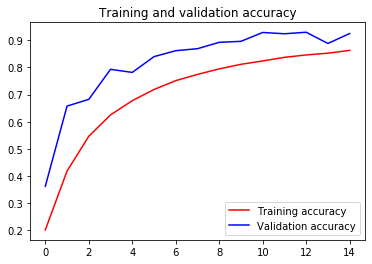

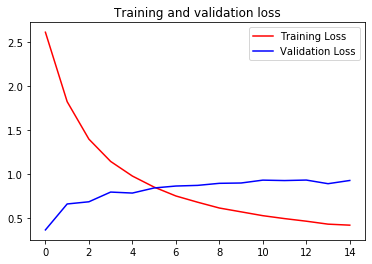

In [8]:
%matplotlib inline
import matplotlib.pyplot as plt
acc = history.history['accuracy']
val_acc = history.history['val_accuracy']
loss = history.history['loss']
val_loss = history.history['val_accuracy']

epochs = range(len(acc))

plt.plot(epochs, acc, 'r', label='Training accuracy')
plt.plot(epochs, val_acc, 'b', label='Validation accuracy')
plt.title('Training and validation accuracy')
plt.legend()
plt.figure()

plt.plot(epochs, loss, 'r', label='Training Loss')
plt.plot(epochs, val_loss, 'b', label='Validation Loss')
plt.title('Training and validation loss')
plt.legend()

plt.show()


In [9]:
model.save("model.h")

Instructions for updating:
If using Keras pass *_constraint arguments to layers.
INFO:tensorflow:Assets written to: model.h/assets
